In [1]:
import pandas as pd
import numpy as np
import os
from scipy.sparse import load_npz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_data = '../../datasets/kleinlab/'

In [3]:
df_metadata = pd.read_csv(os.path.join(dir_data,'cell_metadata_in_vitro.txt.gz'),sep='\t')
df_metadata.rename(columns={"Time point": "time"},inplace=True)
print(df_metadata.shape)
df_metadata.head()

(130887, 4)


,time,Population,Annotation,Well
0,6.0,LK,undiff,2
1,6.0,LK,undiff,2
2,6.0,LK,Monocyte,2
3,6.0,LK,Neutrophil,2
4,6.0,LK,undiff,2


In [4]:
input_coord =  pd.read_csv(os.path.join(dir_data,'coordinates_in_vitro.txt.gz'),sep='\t',header=None)
df_coord = pd.DataFrame(np.column_stack((input_coord.loc[:(input_coord.shape[0]/2-1),:],input_coord.loc[(input_coord.shape[0]/2):,:])),
                       columns=[0,1])
print(df_coord.shape)
df_coord.head()

(130887, 2)


,0,1
0,411.496,-96.190
1,-587.462,-306.925
2,1429.805,-429.300
3,1150.028,-2030.369
4,-1169.594,362.010


In [5]:
mat_clones = load_npz(os.path.join(dir_data,'clone_annotation_in_vitro.npz'))
df_clones = pd.DataFrame(mat_clones.toarray().astype(int))
print(df_clones.shape)
df_clones.head()

(130887, 5864)


,0,1,2,3,4,5,6,7,8,9,...,5854,5855,5856,5857,5858,5859,5860,5861,5862,5863
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### filter out cells without any cell tag

In [6]:
id_cells = np.where(df_clones.sum(axis=1)>0)[0]
df_clones_output = df_clones.iloc[id_cells,]
df_metadata_outpout = df_metadata.iloc[id_cells,]
df_coord_output = df_coord.iloc[id_cells,]

In [7]:
print(df_clones_output.shape)
df_clones_output.head()

(49302, 5864)


,0,1,2,3,4,5,6,7,8,9,...,5854,5855,5856,5857,5858,5859,5860,5861,5862,5863
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df_metadata_outpout.shape)
df_metadata_outpout.head()

(49302, 4)


,time,Population,Annotation,Well
0,6.0,LK,undiff,2
1,6.0,LK,undiff,2
2,6.0,LK,Monocyte,2
4,6.0,LK,undiff,2
6,6.0,LK,Neutrophil,2


In [9]:
print(df_coord_output.shape)
df_coord_output.head()

(49302, 2)


,0,1
0,411.496,-96.190
1,-587.462,-306.925
2,1429.805,-429.300
4,-1169.594,362.010
6,1236.039,-2113.013


### output files

In [10]:
workdir = 'output_all'
if(not os.path.exists(workdir)):
    os.makedirs(workdir)

In [11]:
df_clones_output.to_csv(os.path.join(workdir,'clones.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
# df_clones_output.to_csv(os.path.join(workdir,'clones.tsv'),header=True,index=True,sep='\t')
df_metadata_outpout.to_csv(os.path.join(workdir,'metadata.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_coord_output.to_csv(os.path.join(workdir,'coordinates.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')

In [12]:
df_clones_output.head()

,0,1,2,3,4,5,6,7,8,9,...,5854,5855,5856,5857,5858,5859,5860,5861,5862,5863
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_tags = pd.DataFrame(columns=['Tag_0'],dtype=int)
ids = np.where(df_clones_output)
df_tags = pd.DataFrame(data=df_clones_output.columns[ids[1]],
                       index=df_clones_output.index[ids[0]],columns=['Tag_0'])
df_tags.head()

,Tag_0
0,573
1,1440
2,394
4,1972
6,1450


In [14]:
df_plot = pd.concat((df_metadata_outpout,df_coord_output,df_tags),axis=1)
df_plot.head()

,time,Population,Annotation,Well,0,1,Tag_0
0,6.0,LK,undiff,2,411.496,-96.190,573
1,6.0,LK,undiff,2,-587.462,-306.925,1440
2,6.0,LK,Monocyte,2,1429.805,-429.300,394
4,6.0,LK,undiff,2,-1169.594,362.010,1972
6,6.0,LK,Neutrophil,2,1236.039,-2113.013,1450


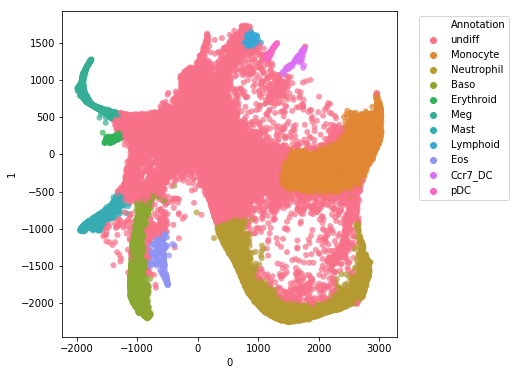

In [15]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=0, y=1,hue='Annotation',data=df_plot,linewidth=0,alpha=0.7)
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))

### select clones 

In [16]:
##choose clones that span three time points and go into the specified branches 
def select_clones(df_metadata,df_clones,ratio=1.0,cutoff_timepoints=2,
                  celltypes=['Neutrophil','Monocyte','Baso','Mast','Meg']):
    
    df_tags = pd.DataFrame(columns=['Tag_0'],dtype=int)
    ids = np.where(df_clones)
    df_tags = pd.DataFrame(data=df_clones.columns[ids[1]],
                           index=df_clones.index[ids[0]],columns=['Tag_0'])

    clones_selected = list()
    clones_truth = pd.DataFrame(columns=['celltype'])
    for x in np.sort(df_tags['Tag_0'].unique()):
        cells_x = df_tags['Tag_0'][df_tags['Tag_0']==x].index
        #the number of spanned timepoints for clone x 
        n_timepoints_x = len(df_metadata.loc[cells_x,'time'].unique()) 
        if(n_timepoints_x>cutoff_timepoints):
            #the ratio of cells falling into a specific cell type
            cells_x_selected = cells_x[df_metadata.loc[cells_x,'time']==6]
            list_anno_x = df_metadata.loc[cells_x_selected,'Annotation'].tolist()
            celltype = max(set(list_anno_x), key = list_anno_x.count)
            pct_celltype = np.float(list_anno_x.count(celltype))/len(list_anno_x)
            if((celltype in celltypes) and (pct_celltype==ratio)):
                clones_selected.append(x)
                clones_truth.loc[x,] = celltype
    return clones_selected,clones_truth

In [17]:
clones_selected,clones_truth = select_clones(df_metadata_outpout,df_clones_output)

In [18]:
len(clones_selected)

365

In [19]:
clones_truth

,celltype
50,Neutrophil
82,Neutrophil
105,Baso
111,Neutrophil
134,Monocyte
...,...
5805,Neutrophil
5806,Monocyte
5818,Neutrophil
5832,Neutrophil


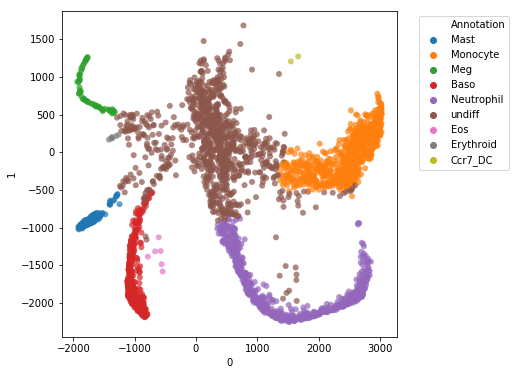

In [20]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=0, y=1,hue='Annotation',data=df_plot[np.isin(df_plot['Tag_0'],clones_selected)],
                     linewidth=0,alpha=0.7)
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))

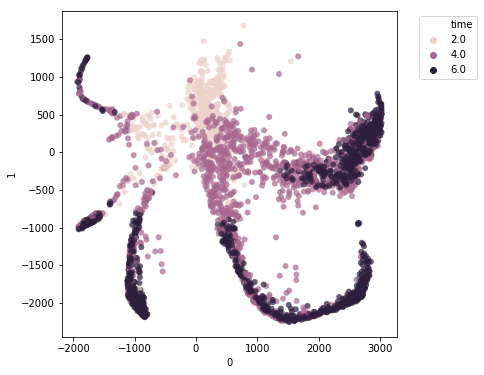

In [21]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=0, y=1,hue='time',
                     data=df_plot.loc[df_clones_output.index[df_clones_output[clones_selected].sum(axis=1)>0],],
                     linewidth=0,alpha=0.7,legend="full")
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))

In [22]:
workdir = 'output_subset'
if(not os.path.exists(workdir)):
    os.makedirs(workdir)

In [23]:
id_cells_subset = df_clones_output.index[df_clones_output[clones_selected].sum(axis=1)>0]

In [24]:
df_clones_output_subset = df_clones_output.loc[id_cells_subset,]
df_metadata_outpout_subset = df_metadata_outpout.loc[id_cells_subset,]
df_coord_output_subset = df_coord_output.loc[id_cells_subset,]

In [25]:
print(df_clones_output_subset.shape)
df_clones_output_subset.head()

(3221, 5864)


,0,1,2,3,4,5,6,7,8,9,...,5854,5855,5856,5857,5858,5859,5860,5861,5862,5863
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_clones_output_subset.to_csv(os.path.join(workdir,'clones.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
# df_clones_output.to_csv(os.path.join(workdir,'clones.tsv'),header=True,index=True,sep='\t')
df_metadata_outpout_subset.to_csv(os.path.join(workdir,'metadata.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_coord_output_subset.to_csv(os.path.join(workdir,'coordinates.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')

In [27]:
clones_truth.to_csv(os.path.join(workdir,'clones_truth.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')